In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [96]:
negativeQuestions = ["[I dislike singing]", "[I do not find karaoke amusing]", "[The time goes very slow when I do karaoke]", "[I feel bored]", "[I prefer karaoke without any effects]", "[I quickly get exhausted by new technologies]", "[I do not like karaoke]"]

def depolarize(s):
    out = [5 - int(item) + 1 for item in s]
    return out

def adjust(dataframe):
    dataframe.replace({ "Completely agree" : 5,
                        "Somewhat agree" : 4,
                        "Neutral" : 3,
                        "Somewhat disagree" : 2,
                        "Completely disagree" : 1 }, inplace=True)

    dataframe.drop(columns=["Timestamp"], inplace=True)
    
    dataframe[negativeQuestions] = dataframe[negativeQuestions].apply(depolarize)
    dataframe = dataframe.drop(columns=["Name"]).join(dataframe["Name"])

    renameDict = {index : dataframe["Name"][index] for index in range(len(dataframe["Name"]))}
    dataframe = dataframe.rename(index=renameDict).drop(columns=["Name"])
    
    return dataframe

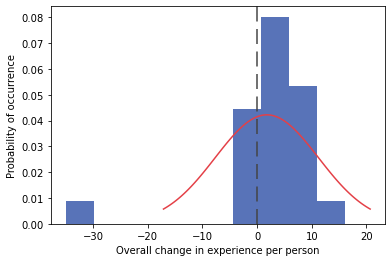

In [97]:
resWithout = pd.read_excel("results.xlsx", "without")
resWith = pd.read_excel("results.xlsx", "with")

resWithout, resWith = (adjust(resWithout), adjust(resWith))

differences = resWith.sum(axis=1) - resWithout.sum(axis=1)

mu = differences.mean()
variance = differences.var()
sigma = differences.std()
x = np.linspace(mu - 2*sigma, mu + 2*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color="#E44047")
plt.axvline(x=0, color="#444444").set_dashes([10, 5])
plt.hist(differences, density=True, bins=10, color="#5873B8")
plt.xlabel("Overall change in experience per person")
plt.ylabel("Probability of occurrence")
plt.show()

In [99]:
resWithSum =resWith.apply(pd.Series.value_counts, axis=0).fillna(0)

In [55]:
resWithSum

,[I like Karaoke],[I dislike singing],[I feel entertained],[I feel excited],[I do not find karaoke amusing],[The time goes very slow when I do karaoke],[I feel bored],[I think an option to add funny effects to the voice would make karaoke more enjoyable],[I like singing],[I prefer karaoke without any effects],[I quickly get exhausted by new technologies],[I do not like karaoke],[I feel the time flies when I do karaoke],[I like exploring new technologies]
1,2,2,1,1,2,1,1.0,1.0,1,1,0.0,1,2,1
2,1,4,1,1,3,4,0.0,0.0,3,2,4.0,1,1,4
3,4,1,1,5,2,3,2.0,0.0,1,6,3.0,3,5,4
4,5,4,11,9,8,7,10.0,9.0,5,8,7.0,7,8,4
5,10,11,8,6,7,7,9.0,12.0,12,5,8.0,10,6,9


In [103]:
resWithoutSum =resWithout.apply(pd.Series.value_counts).fillna(0)

In [107]:
resWithoutSum

,[I like Karaoke],[I dislike singing],[I feel entertained],[I feel excited],[I do not find karaoke amusing],[The time goes very slow when I do karaoke],[I feel bored],[I think an option to add funny effects to the voice would make karaoke more enjoyable],[I like singing],[I prefer karaoke without any effects],[I quickly get exhausted by new technologies],[I do not like karaoke],[I feel the time flies when I do karaoke],[I like exploring new technologies]
1,0.0,0.0,1,1,1,0.0,2,1.0,1,0.0,1,0.0,1,0.0
2,2.0,3.0,3,5,4,3.0,3,0.0,4,3.0,4,2.0,5,4.0
3,6.0,2.0,5,6,2,5.0,2,1.0,2,7.0,3,3.0,7,2.0
4,6.0,9.0,6,8,10,8.0,6,10.0,6,6.0,6,5.0,5,8.0
5,8.0,8.0,7,2,5,6.0,9,10.0,9,6.0,8,12.0,4,8.0


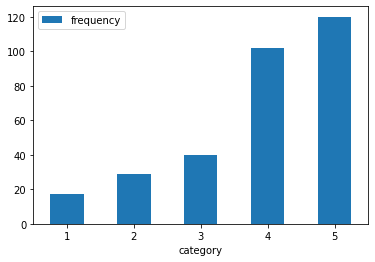

In [112]:
df_w= pd.DataFrame({'category':['1','2','3','4','5'],'frequency':[17,29,40,102,120]})
ax = df_w.plot.bar(x='category',y='frequency',rot=0)

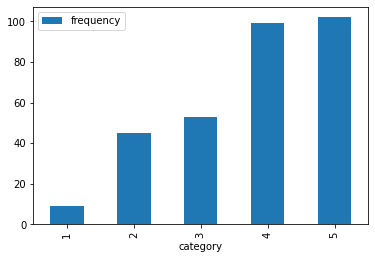

In [111]:
df_wO= pd.DataFrame({'category':['1','2','3','4','5'],'frequency':[9,45,53,99,102]})
ax = df_wO.plot.bar(x='category',y='frequency')

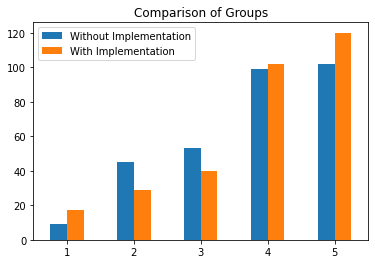

In [120]:
after = [17,29,40,102,120]
before =[9,45,53,99,102]
index= [1,2,3,4,5]
df =pd.DataFrame({'Without Implementation':before,'With Implementation':after},index=index)

ax1 =df.plot.bar(title = 'Comparison of Groups',rot=0)

In [129]:
df_wO.frequency.var(), df_w.frequency.var()

(1536.8, 2140.2999999999997)

In [153]:
resWithoutCountSum=resWithout.sum(axis=1)

In [152]:
resWithCountSum =resWith.sum(axis=1)

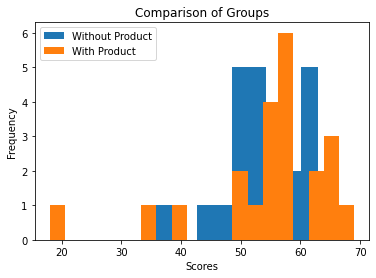

In [165]:
plt.hist(resWithoutCountSum, label ="Without Product")
plt.hist(resWithCountSum, bins=20, label ='With Product')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Comparison of Groups')
plt.legend()
plt.show()

# Assumptions

## Variance-Criteria 
## -Levene 

- This control tests tests the null hypothesis that all samples come from populations with equal variances. It returns the test statistic ('W') and the probabilyt ('p').
- The variance criterion holds true when p > a (where a is the probability threshold usually set to 0.05)

In [166]:
stats.levene(resWithoutCountSum.dropna(),resWithCountSum.dropna())
#If p < 0.05 then the assumption of homogenity between the two variances has been violated

LeveneResult(statistic=0.30349708576186474, pvalue=0.5846171152899291)

## Normality-test 
## -Sharpiro and QQ-plot

 - This control tests the null hypothesis that the data was drawn from a normal distribution and returns the test statistic ('W') and the probability ('p').
 - The normality criterion holds true when p > a (where a is the probability threshold usually set to 0.05)

Shapiro-Wilk test statistics W_c = 0.93 ,  p_c value = 0.14


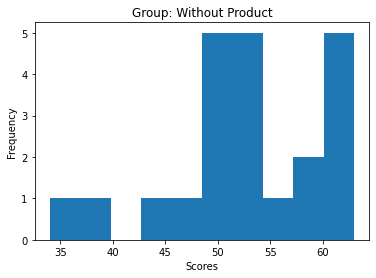

In [181]:
[W_c,p_c]=stats.shapiro(resWithoutCountSum.dropna())
print('Shapiro-Wilk test statistics W_c =', "%.2f"%W_c,',  p_c value =', "%.2f" %p_c)
plt.hist(resWithoutCountSum)
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Group: Without Product')
plt.show()

Shapiro-Wilk test statistics W_c = 0.82 ,  p_c value = 0.0009087427752092481


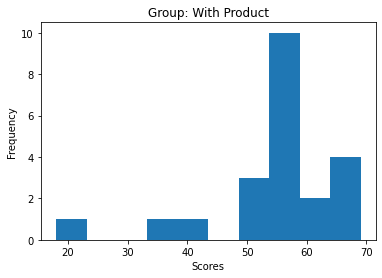

In [188]:
[W_c,p_c]=stats.shapiro(resWithCountSum.dropna())
print('Shapiro-Wilk test statistics W_c =', "%.2f"%W_c,',  p_c value =', p_c)
plt.hist(resWithCountSum)
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Group: With Product')
plt.show()

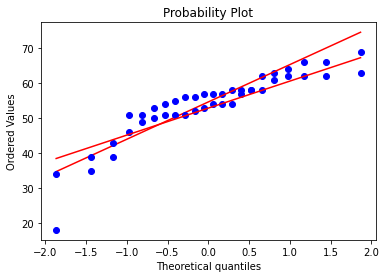

In [186]:
res1 = stats.probplot(resWithCountSum.dropna(), plot=plt)
res2 = stats.probplot(resWithoutCountSum.dropna(), plot=plt)


### As both p_c and p_t are >0.05, they both conform to the normality criterion 

In [ ]:
#H_0 = The implementation is not 

In [155]:
# the method returns the value of the statistic (t) and the probability value (p)
t, p = stats.ttest_ind(resWithoutCountSum.dropna(), resWithCountSum.dropna())
print ('t-stat:',t, 'probability:',p)

t-stat: -0.6060688737617711 probability: 0.5477307964136304


In [ ]:
# Since p < a (0.05) we say that the null hypothesis is rejected and suggest an alternative: 